# **Problem Statement**


Consider only the below columns and prepare a prediction
model for predicting Price.\

Corolla<-
Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]\


*   Model -- model of the car

*   Price -- Offer Price in EUROs

*   Age_08_04 -- Age in months as in August 2004

*   KM -- Accumulated Kilometers on odometer

*   HP -- Horse Power
*   cc -- Cylinder Volume in cubic centimeters


*   Doors -- Number of doors


*   Gears -- Number of gear positions


*   Quarterly_Tax -- Quarterly road tax in EUROs


*   Weight -- Weight in Kilograms












In [856]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings ('ignore')

**Step 1: Importing data**

In [857]:
df = pd.read_csv('/content/ToyotaCorolla.csv', encoding= 'unicode_escape')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


**Step 2: EDA**

In [858]:
print('Number of Rows{}Columns'.format(df.shape))

Number of Rows(1436, 38)Columns


In [859]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

**2.1 Performing Basic Explanatory Data Analysis**

In [860]:
df = df[['Model','Price','Age_08_04','KM','HP','cc','Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
df

,Model,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,1300,3,5,69,1015


In [861]:
df = df.rename (columns = {'Age_08_04': 'Age', 'cc' : 'CC', 'Quarterly_Tax' : 'Tax'})

In [862]:
df.head()

,Model,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170


In [863]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Model   1436 non-null   object
 1   Price   1436 non-null   int64 
 2   Age     1436 non-null   int64 
 3   KM      1436 non-null   int64 
 4   HP      1436 non-null   int64 
 5   CC      1436 non-null   int64 
 6   Doors   1436 non-null   int64 
 7   Gears   1436 non-null   int64 
 8   Tax     1436 non-null   int64 
 9   Weight  1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [864]:
df.describe()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [865]:
np.round(df.describe(),0)

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
count,1436.0,1436.0,1436.0,1436.0,1436.0,1436.0,1436.0,1436.0,1436.0
mean,10731.0,56.0,68533.0,102.0,1577.0,4.0,5.0,87.0,1072.0
std,3627.0,19.0,37506.0,15.0,424.0,1.0,0.0,41.0,53.0
min,4350.0,1.0,1.0,69.0,1300.0,2.0,3.0,19.0,1000.0
25%,8450.0,44.0,43000.0,90.0,1400.0,3.0,5.0,69.0,1040.0
50%,9900.0,61.0,63390.0,110.0,1600.0,4.0,5.0,85.0,1070.0
75%,11950.0,70.0,87021.0,110.0,1600.0,5.0,5.0,85.0,1085.0
max,32500.0,80.0,243000.0,192.0,16000.0,5.0,6.0,283.0,1615.0


In [866]:
df[df.values == 0]

,Model,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight


In [867]:
df[df.duplicated()].shape

(1, 10)

In [868]:
df[df.duplicated(keep=False)]

,Model,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
112,TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV,24950,8,13253,116,2000,5,5,234,1320
113,TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV,24950,8,13253,116,2000,5,5,234,1320


In [869]:
df = df.drop_duplicates()
df

,Model,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,1300,3,5,69,1025
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,1300,3,5,69,1015
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,1300,3,5,69,1015
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,1300,3,5,69,1015



*   There was duplicated values in the dataset.Hence, we dropped those values







In [870]:
df[df.duplicated(keep=False)]

,Model,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight


**2.2 Test of normality**



*   To check if the data is sampled from a normal distribution



1.   Visualizing the Distribution of Continuous Features with the help of Histograms and Probability QQ Plot
2.   Using Shapiro's Test 




In [871]:
import pylab
def plot_data(df,feature):
  plt.figure(figsize=(8,4))
  plt.subplot(121)
  df[feature].hist()    #histogram plot
  plt.subplot(122)
  stats.probplot(df[feature], dist ='norm', plot = pylab)    #this is same as the qq plot => sm.qqplot(df,line ='q), since we can't subplot qq plot


Text(0.5, 1.0, 'Weight')

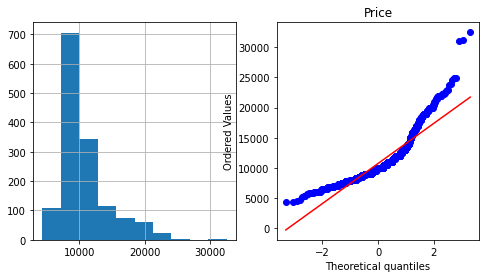

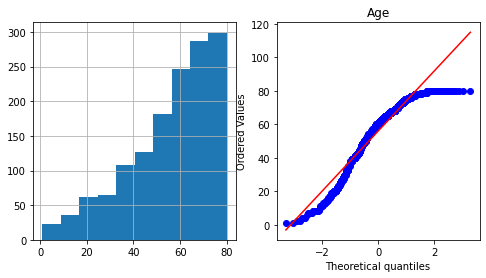

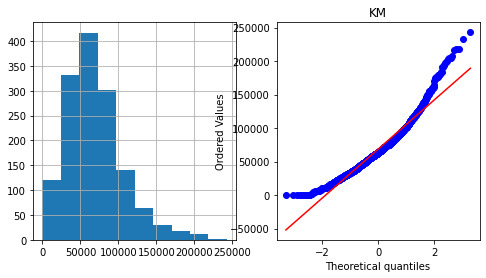

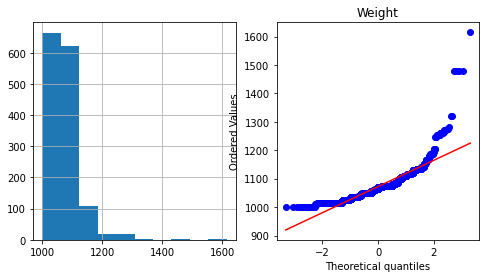

In [872]:
plot_data(df,'Price')
plt.title('Price')
plot_data(df,'Age')
plt.title('Age')
plot_data(df,'KM')
plt.title('KM')
plot_data(df,'Weight')
plt.title('Weight')

Note: Most of the Continuous Features visually do not look normally distributed lets have some
Hypothetical test to check the normailty.


***Shapiro-Wilk test:*** *The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.*


*   To perform a Shapiro-Wilk test in Python we can use the scipy.stats.shapiro() function

*   It considers,\
H0: The values are sampled from population that follows normally distribution ( if pvalue > alpha ==> accept H0 or else reject H0 )\
H1: The values are **not** sampled from population that follows normally distribution ( if pvalue < alpha ==> Reject HO and accept H1)


In [873]:
df.head(2)

,Model,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165


In [874]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('Price feature',shapiro (df.Price),'\n'
      'Age feature',shapiro (df.Age),'\n'
      'KM feature',shapiro (df.KM),'\n'
      'Weight feature',shapiro (df.Weight))


Price feature ShapiroResult(statistic=0.8534729480743408, pvalue=1.5960294063332542e-34) 
Age feature ShapiroResult(statistic=0.926694929599762, pvalue=6.738004885543532e-26) 
KM feature ShapiroResult(statistic=0.9475831389427185, pvalue=3.444094263209402e-22) 
Weight feature ShapiroResult(statistic=0.7825542688369751, pvalue=5.042796731627146e-40)


Since the p-values are less than .05, we reject the null hypothesis, which implies data is not sampled from normal distribution

**We have sufficient evidence to say that the sample data does not come from a normal distribution**

---



**Step 3: Check for outliers**

Visualizing the Relation between each independent Feature with respect to
the Dependent Feature

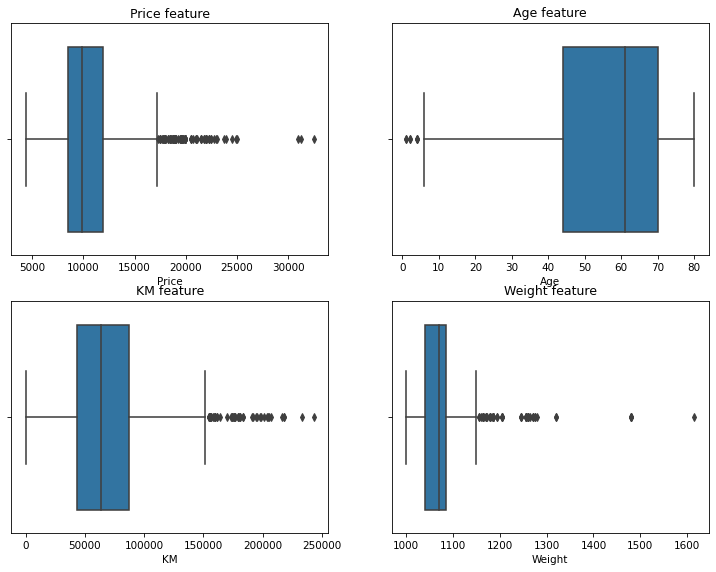

In [875]:
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.dpi'] = 75

plt.subplot(221)
sns.boxplot(x = df['Price'])
plt.title('Price feature')

plt.subplot(222)
sns.boxplot(x = df['Age'])
plt.title('Age feature')

plt.subplot(223)
sns.boxplot(x = df['KM'])
plt.title('KM feature')

plt.subplot(224)
sns.boxplot(x = df['Weight'])
plt.title('Weight feature')

plt.show()

<AxesSubplot:xlabel='Weight'>

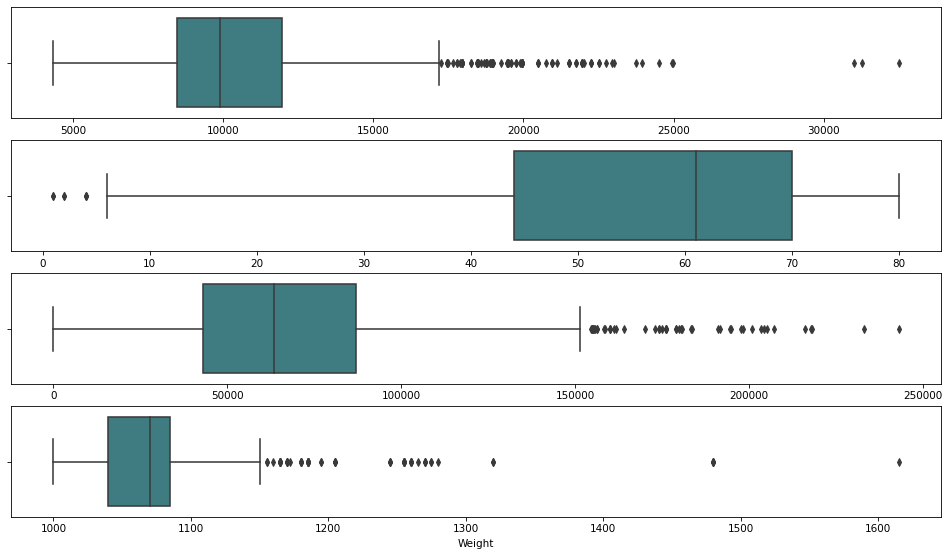

In [876]:
fig, axes=plt.subplots(4,1,figsize=(16,9),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])

A significant amount of outliers are present in each continuous
feature
Note:

*   We can't simply remove the outliers that would mean loss of information

*   We need to try different types of transformation or imputation and select the one with the best results
*   Transforming variables can also eliminate outliers. The Transformed Variables reduces the variation caused by thr extreme values





In [877]:
data = df.copy()

In [878]:
Q1 = np.quantile(data.Price,0.25)
Q3 = np.quantile(data.Price,0.75)
med = np.median(data.Price)
IQR = Q3 - Q1
upper_whisker = Q3+(1.5*IQR)
lower_whisker = Q1-(1.5*IQR)

print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_whisker,'\n' 'Lower Whisker=', lower_whisker)

Outliers_price = data.Price[(df.Price > upper_whisker) | (data.Price < lower_whisker)]
Outliers_price

First Quantile= 8450.0 
Second Quantile= 9900.0 
Third Quantile= 11950.0 
Inter-Quartile Range= 3500.0 
Upper Whisker= 17200.0 
Lower Whisker= 3200.0


7      18600
8      21500
10     20950
11     19950
12     19600
       ...  
182    21125
183    21500
184    17795
185    18245
523    18950
Name: Price, Length: 109, dtype: int64

In [879]:
len(Outliers_price)

109

In [880]:
Q1 = np.quantile(data.Age,0.25)
Q3 = np.quantile(data.Age,0.75)
med = np.median(data.Age)
IQR = Q3 - Q1
upper_whisker = Q3+(1.5*IQR)
lower_whisker = Q1-(1.5*IQR)

print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_whisker,'\n' 'Lower Whisker=', lower_whisker)

Outliers_age = data.Age[(data.Age > upper_whisker) | (data.Age < lower_whisker)]
Outliers_age

First Quantile= 44.0 
Second Quantile= 61.0 
Third Quantile= 70.0 
Inter-Quartile Range= 26.0 
Upper Whisker= 109.0 
Lower Whisker= 5.0


109    4
110    4
111    4
182    2
183    2
184    1
185    1
Name: Age, dtype: int64

In [881]:
Q1 = np.quantile(data.KM,0.25)
Q3 = np.quantile(data.KM,0.75)
med = np.median(data.KM)
IQR = Q3 - Q1
upper_whisker = Q3+(1.5*IQR)
lower_whisker = Q1-(1.5*IQR)

print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_whisker,'\n' 'Lower Whisker=', lower_whisker)

Outliers_km = data.KM[(data.KM > upper_whisker) | (data.KM < lower_whisker)]
Outliers_km

First Quantile= 43000.0 
Second Quantile= 63451.0 
Third Quantile= 87041.5 
Inter-Quartile Range= 44041.5 
Upper Whisker= 153103.75 
Lower Whisker= -23062.25


186     243000
187     180638
188     179860
189     178858
190     161000
191     158320
378     216000
379     198167
380     176000
381     174139
382     174000
603     205000
604     204250
605     194545
606     190900
607     183500
608     176184
609     174833
610     155720
611     155500
612     154783
613     154462
1044    232940
1045    218118
1046    217764
1047    207114
1048    203254
1049    200732
1050    197501
1051    194765
1052    191620
1053    183277
1054    180378
1055    178800
1056    176177
1057    176000
1058    172980
1059    170000
1060    164000
1061    161775
1062    160000
1063    159968
1064    159908
1065    158492
1066    156204
1067    156169
1068    155210
1069    155000
1070    154900
Name: KM, dtype: int64

In [882]:
len(Outliers_km)

49

In [883]:
Q1 = np.quantile(data.Weight,0.25)
Q3 = np.quantile(data.Weight,0.75)
med = np.median(data.Weight)
IQR = Q3 - Q1
upper_whisker = Q3+(1.5*IQR)
lower_whisker = Q1-(1.5*IQR)

print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_whisker,'\n' 'Lower Whisker=', lower_whisker)

Outliers_weight = data.Weight[(data.Weight > upper_whisker) | (data.Weight < lower_whisker)]
Outliers_weight

First Quantile= 1040.0 
Second Quantile= 1070.0 
Third Quantile= 1085.0 
Inter-Quartile Range= 45.0 
Upper Whisker= 1152.5 
Lower Whisker= 972.5


0       1165
1       1165
2       1165
3       1165
4       1170
        ... 
601     1260
654     1260
768     1155
960     1480
1044    1172
Name: Weight, Length: 65, dtype: int64

In [884]:
len(Outliers_weight)

65

Lets see how the model is performing without removing the outliers and check the fit of the model

In [885]:
raw_data_model_with_outliers = smf.ols("Price~Age+KM+Weight", data = df).fit()
# Finding rsquared values
raw_data_model_with_outliers.rsquared_adj

0.8464186732406873

The model is performing well without remving the outlier itself.

**Step 4: Check the Correlation**

Visualizing the Relation between each independent Feature with respect to
the Dependent Feature




*   Analysing the relationship between the continous variables and Price




In [886]:
df.head()

,Model,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170


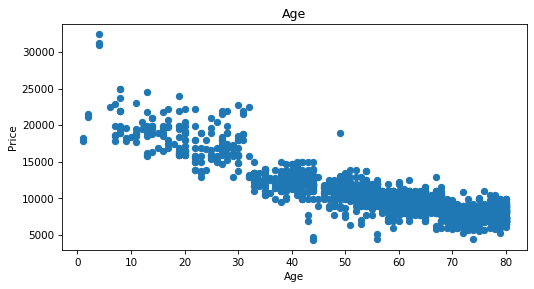

In [887]:
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 75


plt.scatter(df['Age'],df['Price'])
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Age')
plt.show()


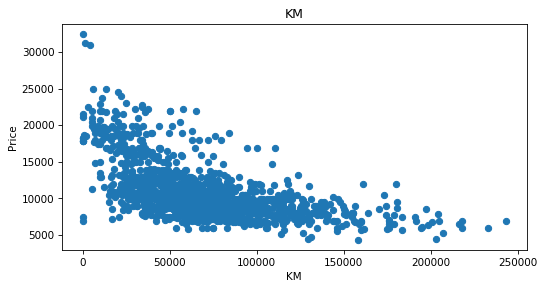

In [888]:
plt.scatter(df['KM'],df['Price'])
plt.xlabel('KM')
plt.ylabel('Price')
plt.title('KM')
plt.show()

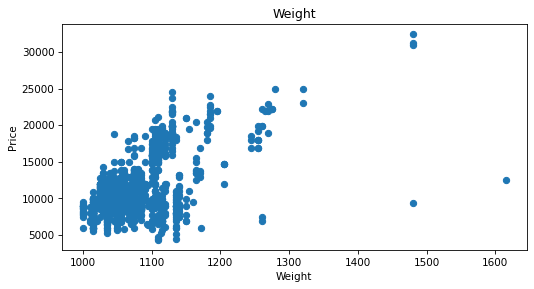

In [889]:
plt.scatter(df['Weight'],df['Price'])
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Weight')
plt.show()





*   Analysing the relationship between the discrete variables and Price




In [890]:
df.columns

Index(['Model', 'Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Tax',
       'Weight'],
      dtype='object')

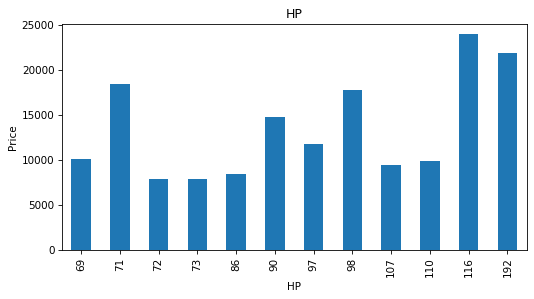

In [891]:
#using groupby HP value against median of price               #this is like plotting bar chart for sum of sales against brand name
df.groupby('HP')['Price'].median().plot.bar()                 # we calculate median of price here since we need to chk the avg price for that particular HP
plt.xlabel('HP')
plt.ylabel('Price')
plt.title('HP')
plt.show()


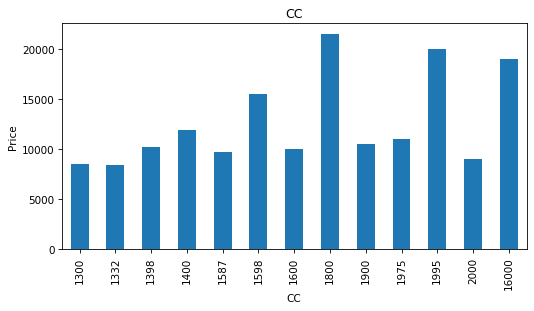

In [892]:
df.groupby('CC')['Price'].median().plot.bar()              
plt.xlabel('CC')
plt.ylabel('Price')
plt.title('CC')
plt.show()

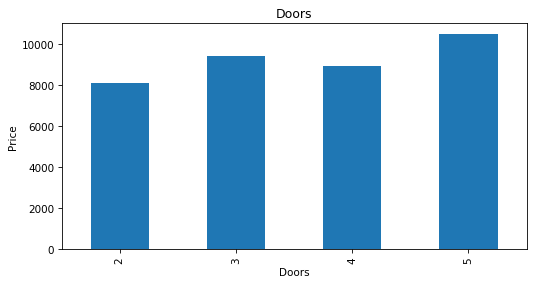

In [893]:
df.groupby('Doors')['Price'].median().plot.bar()              
plt.xlabel('Doors')
plt.ylabel('Price')
plt.title('Doors')
plt.show()

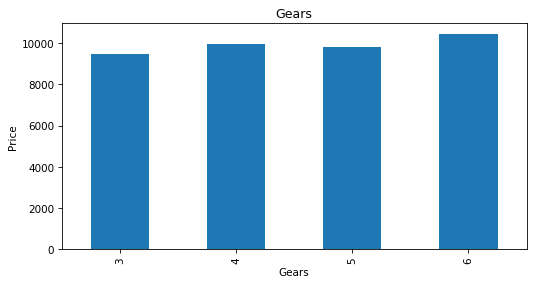

In [894]:
df.groupby('Gears')['Price'].median().plot.bar()              
plt.xlabel('Gears')
plt.ylabel('Price')
plt.title('Gears')
plt.show()

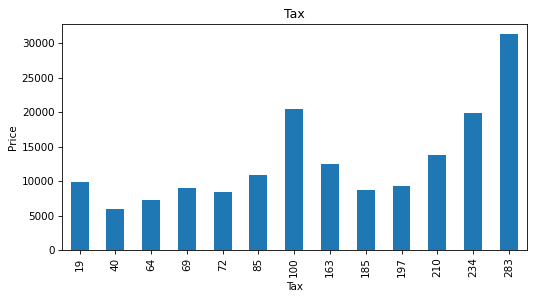

In [895]:
df.groupby('Tax')['Price'].median().plot.bar()              
plt.xlabel('Tax')
plt.ylabel('Price')
plt.title('Tax')
plt.show()

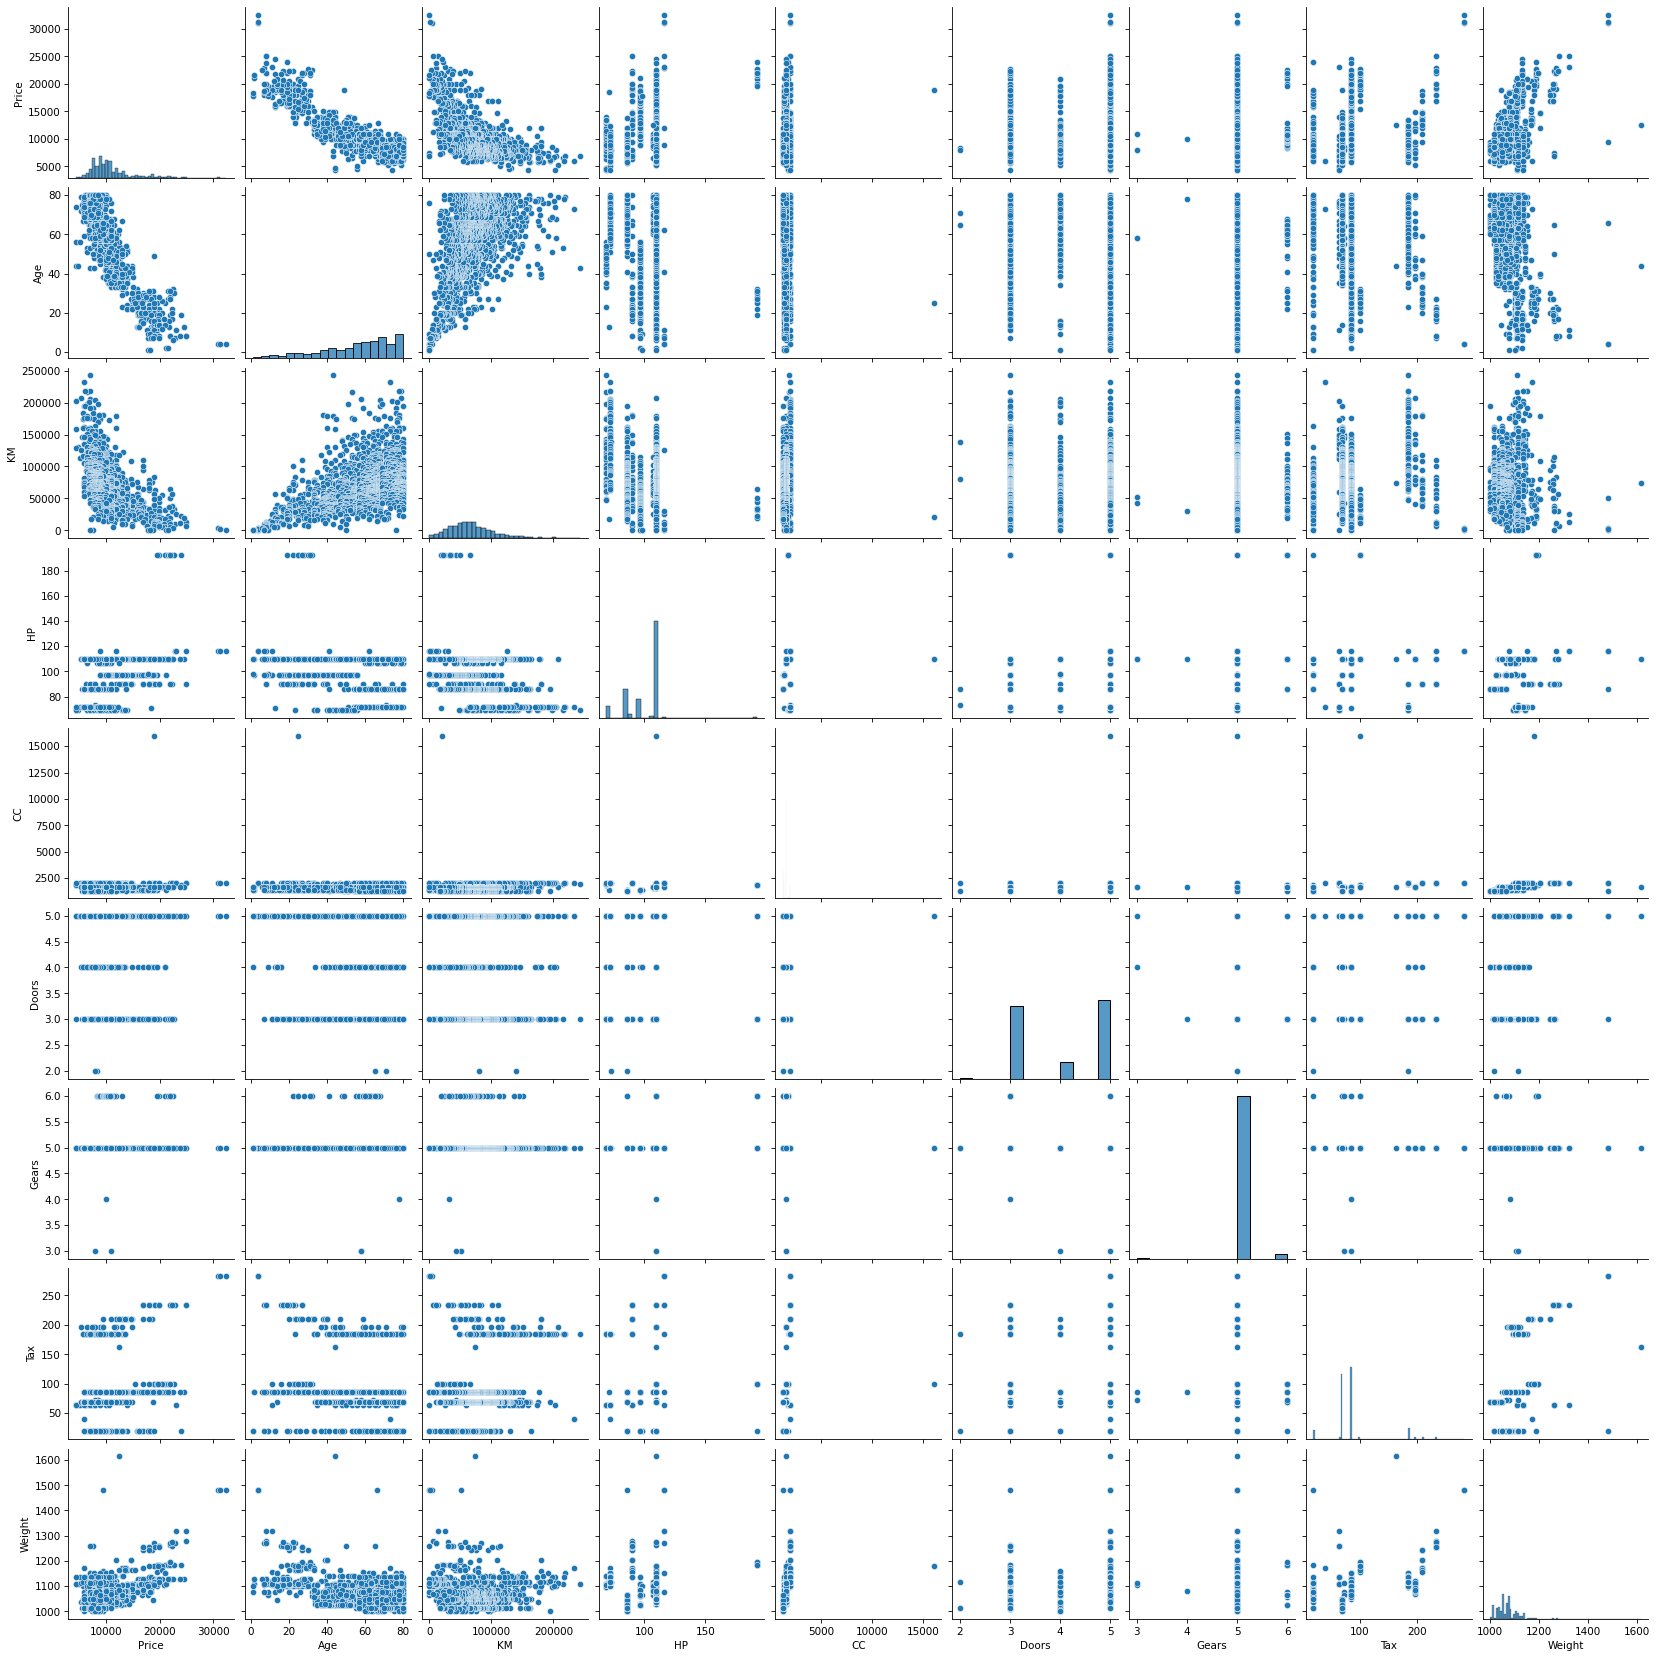

In [896]:
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.dpi'] = 75

sns.pairplot(df)

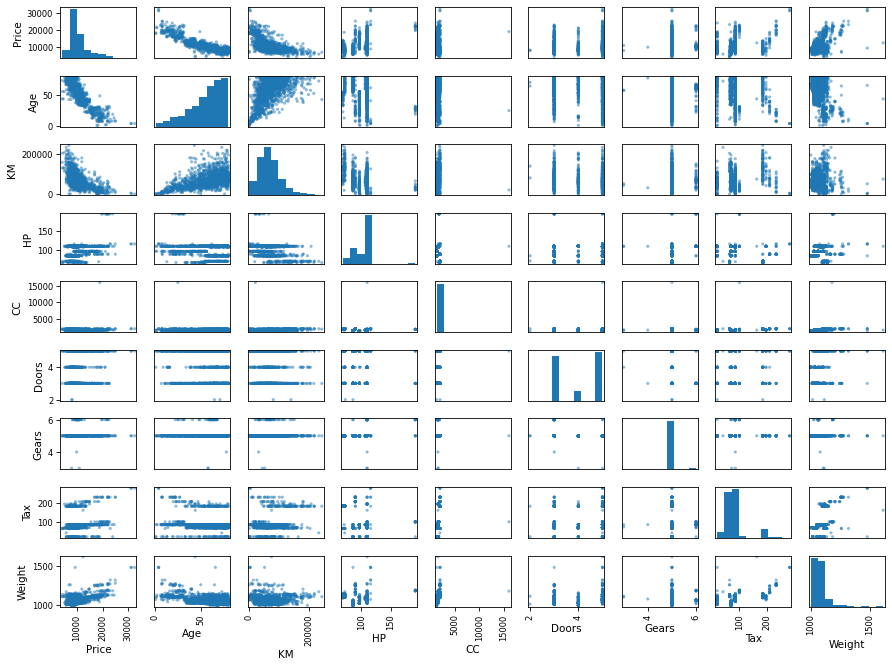

In [897]:
pd.plotting.scatter_matrix(df);
plt.tight_layout()

In [898]:
df.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:>

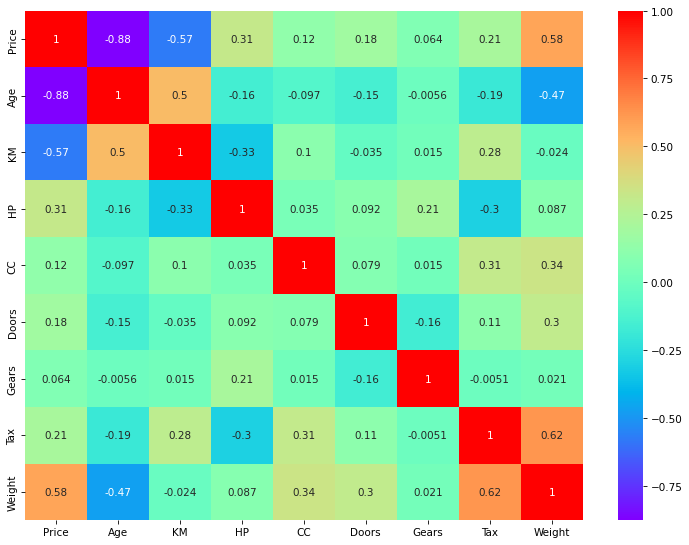

In [899]:
sns.heatmap (df.corr(), annot = True,  cmap='rainbow')

As we can see,

*   Age & KM has the highest score of 88% and 57% negative correlation with Price
*   Weight has the 58% of next highest positive correlation with Price
*   Age & KM  has 50% collinearity among themselves which will affect our model.
*   Age & Weight has 47% negetive collinearity among themselves which will affect our model.
*   QT & Weight also has 62% collinearity among themselves which will affect our model.


**Step 5: Model Building**

In [900]:
raw_model = smf.ols('Price ~ Age+ KM + HP + CC + Doors + Gears + Tax + Weight', data = df).fit()
raw_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:48:52   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As Y = C + m*(X)

Hypothesis testing of X variable by finding test_statistics and P_values for m\
i.e if (P_value < α=0.05 ; Reject Null)\
H0 : p- value of m = 0 (No Slope) \
H1 : p- value of m ≠ 0 (Some or significant Slope)

As per the p-values we got,

If pvalue < (α=0.05); Reject Null hyp. \
pvalue > (α=0.05); Failed to Reject Null hyp
Thus,  

*   H0: p<a: X variable has good slope and variance w.r.t Y variable. (viz. It affects the dependant Variable)

*   H1: p<a: X variable does not have good slope and variance w.r.t Y variable. (viz. It does not affects the dependant variable)





In [901]:
np.round(raw_model.pvalues, 3)

Intercept    0.000
Age          0.000
KM           0.000
HP           0.000
CC           0.188
Doors        0.982
Gears        0.002
Tax          0.003
Weight       0.000
dtype: float64



*   Doors and CC has p_values higher than 0.05
*   Lets check the VIF, RSquared and AIC to support 






In [902]:
cc_model = smf.ols('Price ~ CC', data = df).fit()
cc_model.rsquared, cc_model.aic

(0.015469019620240387, 27561.473196759664)

In [903]:
doors_model = smf.ols('Price ~ Doors', data = df).fit()
doors_model.rsquared, doors_model.aic

(0.033710397123388525, 27534.636141744002)

In [904]:
tax_model = smf.ols('Price ~ Tax', data = df).fit()
tax_model.rsquared, tax_model.aic

(0.04473553944301456, 27518.168998670084)

In [905]:
gears_model = smf.ols('Price ~ Gears', data = df).fit()
gears_model.rsquared, gears_model.aic

(0.004074404058589054, 27577.98600896268)

**Step 7: Solving Multicollinearity**

**7.1  Calculating VIF**

In [906]:
df.columns

Index(['Model', 'Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Tax',
       'Weight'],
      dtype='object')

In [907]:
from statsmodels.stats.outliers_influence import variance_inflation_factor              #Doubt 

#Independent variable set
X = df[['Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Tax', 'Weight']]


#Creating VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# calculating VIF for each feature

vif_data['VIF'] = [variance_inflation_factor (X.values, i)
                               for i in range(len(X.columns))]

vif = vif_data.sort_values(by = 'VIF', ascending = False)
vif 


,feature,VIF
7,Weight,543.522036
5,Gears,439.672599
2,HP,64.894446
4,Doors,21.856114
3,CC,17.186097
0,Age,16.392665
6,Tax,11.021647
1,KM,7.601207


Correlations found

Age-Price -88

WT - Price -57

KM - Price +50

Age-KM +58

Age-WT -47

QT-Weight +62

In [908]:
r_sqr_age = smf.ols('Age ~ HP+Weight+CC+Doors+Tax+Gears+KM', df).fit().rsquared
vif_age = 1/(1-r_sqr_age)
r_sqr_weight = smf.ols('Weight ~ HP+Age+CC+Doors+Tax+Gears+KM', df).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_cc = smf.ols('CC ~ HP+Weight+Age+Doors+Tax+Gears+KM', df).fit().rsquared
vif_cc = 1/(1-r_sqr_cc)
r_sqr_hp = smf.ols('HP ~ Age+Weight+CC+Doors+Tax+Gears+KM', df).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)
r_sqr_qt = smf.ols('Tax ~ HP+Weight+CC+Doors+Age+Gears+KM', df).fit().rsquared
vif_qt = 1/(1-r_sqr_qt)
r_sqr_km = smf.ols('KM ~ HP+Weight+CC+Doors+Tax+Gears+Age', df).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_gears = smf.ols('Gears ~ HP+Weight+CC+Doors+Tax+Age+KM', df).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
r_sqr_doors = smf.ols('Doors ~ HP+Weight+CC+Age+Tax+Gears+KM', df).fit().rsquared
vif_doors = 1/(1-r_sqr_doors)

In [909]:
vif = pd.DataFrame({'Variables':['Age','Weight','CC','HP', 'QT', 'KM', 'Gears', 'Doors'],
                    'Rsquared': [r_sqr_age,r_sqr_weight,r_sqr_cc,r_sqr_hp,r_sqr_qt,r_sqr_km,r_sqr_gears,r_sqr_doors],
                        'VIF':[vif_age, vif_weight, vif_cc, vif_hp, vif_qt, vif_km, vif_gears, vif_doors]})
vif_frame = pd.DataFrame(vif)  
vif_frame.sort_values(by = 'VIF', ascending =False)

,Variables,Rsquared,VIF
1,Weight,0.597938,2.487180
4,QT,0.564341,2.295375
0,Age,0.467018,1.876236
5,KM,0.430906,1.757178
3,HP,0.295368,1.419180
2,CC,0.140502,1.163470
7,Doors,0.134866,1.155890
6,Gears,0.089952,1.098843


* vif values 1 : not correlated.
* vif values 1-5 : moderately correlated.
* vif values above 5 : highly correlated.
As we can see, there is no much of a multi collinearity problem

In [910]:
#Weight is having the highest VIF lets see hoe the model is performing if we remove it

model_without_weight = smf.ols('Price ~ HP+Age+CC+Doors+Tax+Gears+KM', df).fit()
model_without_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1059.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:48:53   Log-Likelihood:                -12481.
No. Observations:                1435   AIC:                         2.498e+04
Df Residuals:                    1427   BIC:                         2.502e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9990.3469   1100.231      9.080      0.000    7832.103    1.21e+04
HP            43.2997      2.944     14.708      0.000      37.525      49.075
Age         -136.3300      2.648    -51.483      0.000    -141.524    -131.136
CC             0.1085      0.096      1.127      0.260      -0.080       0.297
Doors        157.5018     41.925      3.757      0.000      75.260     239.744
Tax           15.9298      1.152     13.827      0.000      13.670      18.190
Gears        625.4171    213.353      2.931      0.003     206.898    1043.936
KM            -0.0200      0.001    -14.715      0.000      -0.023      -0.017
==============================================================================
Omnibus:                      218.215   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.088
Skew:                           0.705   Prob(JB):                    2.75e-177
Kurtosis:                       6.408   Cond. No.                     2.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



*   Accuracy has reduced compared to without removing Weight, so lets not remove weight



In [911]:
# Gears is having the lowest Rsquared value & lowest correlation with price column, lets check if that affectes the model

model_without_gears = smf.ols('Price ~ HP+Age+CC+Doors+Tax+Weight+KM', df).fit()
model_without_gears.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1269.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:48:53   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1427   BIC:                         2.480e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.3843   1061.677     -2.483      0.013   -4718.999    -553.770
HP            33.6479      2.742     12.270      0.000      28.269      39.027
Age         -121.8478      2.622    -46.476      0.000    -126.991    -116.705
CC            -0.1227      0.090     -1.358      0.175      -0.300       0.054
Doors        -23.9806     39.372     -0.609      0.543    -101.214      53.253
Tax            4.0353      1.313      3.073      0.002       1.459       6.611
Weight        16.8844      1.072     15.743      0.000      14.781      18.988
KM            -0.0205      0.001    -16.325      0.000      -0.023      -0.018
==============================================================================
Omnibus:                      149.646   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              980.896
Skew:                          -0.217   Prob(JB):                    1.00e-213
Kurtosis:                       7.027   Cond. No.                     2.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*   Rsquared still remains same as the raw model

In [912]:
model_gears = smf.ols('Price ~ Gears', df).fit()
model_gears.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.863
Date:                Thu, 16 Mar 2023   Prob (F-statistic):             0.0156
Time:                        22:48:53   Log-Likelihood:                -13787.
No. Observations:                1435   AIC:                         2.758e+04
Df Residuals:                    1433   BIC:                         2.759e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4580.9348   2537.643      1.805      0.071    -396.959    9558.828
Gears       1221.5268    504.500      2.421      0.016     231.889    2211.165
==============================================================================
Omnibus:                      480.949   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1497.580
Skew:                           1.691   Prob(JB):                         0.00
Kurtosis:                       6.690   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



*   Even thought the Rsquared is less p value has become less than 0.02, so it affects the model, so cant remove Gears




In [913]:
# Door is having the lowest Rsquared value & and P VALUE> ALPHA, lets check if that affects the model

model_without_doors = smf.ols('Price ~ Doors', df).fit()
model_without_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.40e-12
Time:                        22:48:53   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



*   P value is 0 now when building seperately for Doors. So can keep this as well


In [914]:
model_without_cc = smf.ols('Price ~ CC', df).fit()
model_without_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.29e-06
Time:                        22:48:53   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



*   P value is 0 now when building seperately for cc also. So can keep this as well


**Step 8: Final Model**

In [915]:
final_model = smf.ols('Price ~ Age+ KM + HP + CC + Doors + Gears + Tax + Weight', data = df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:48:53   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Step 9: Model Validation**

**9.1 Residual Analysis**


*  Test for Normality of Residuals (Q-Q Plot)




In [916]:
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 100

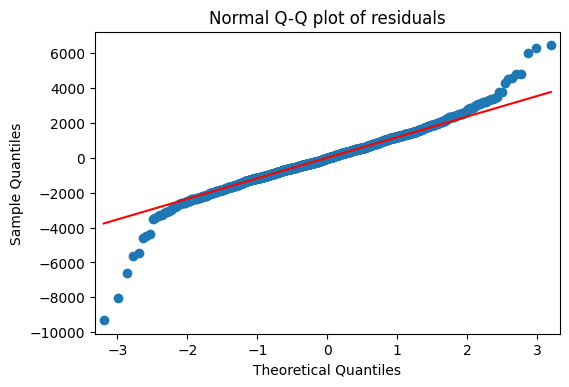

In [917]:
#Residuals values  = y - y_pred

sm.qqplot(final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

As we can see, the data is nearly data normaly distributed. Error should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.

**9.2 Residual Plot to check Homoscedasticity or Hetroscedasticity**

Text(0, 0.5, 'Residual')

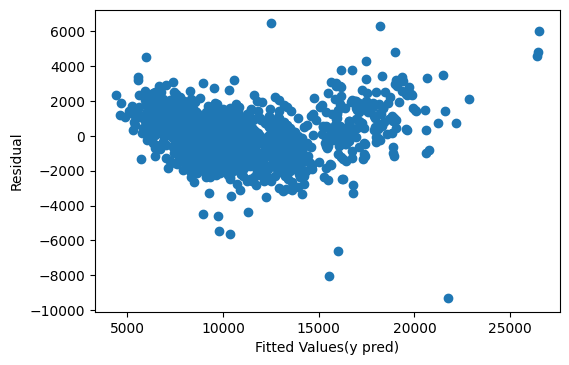

In [918]:
plt.scatter(x = final_model.fittedvalues, y = final_model.resid)
plt.xlabel('Fitted Values(y pred)')
plt.ylabel('Residual')

**9.3 Residual VS Regressor**




*   Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors



eval_env: 1


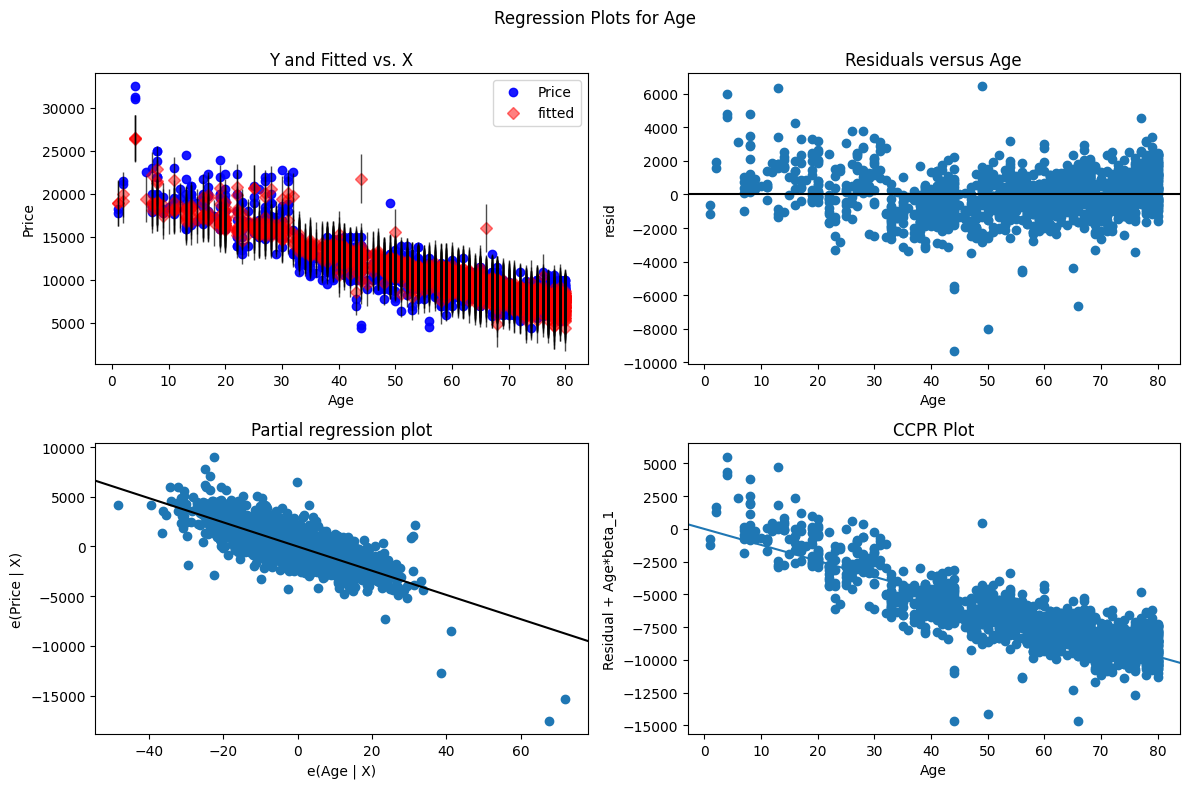

In [919]:
fig = plt.figure(figsize = (12,8))
sm.graphics.plot_regress_exog(final_model, 'Age', fig=fig)
plt.show()

eval_env: 1


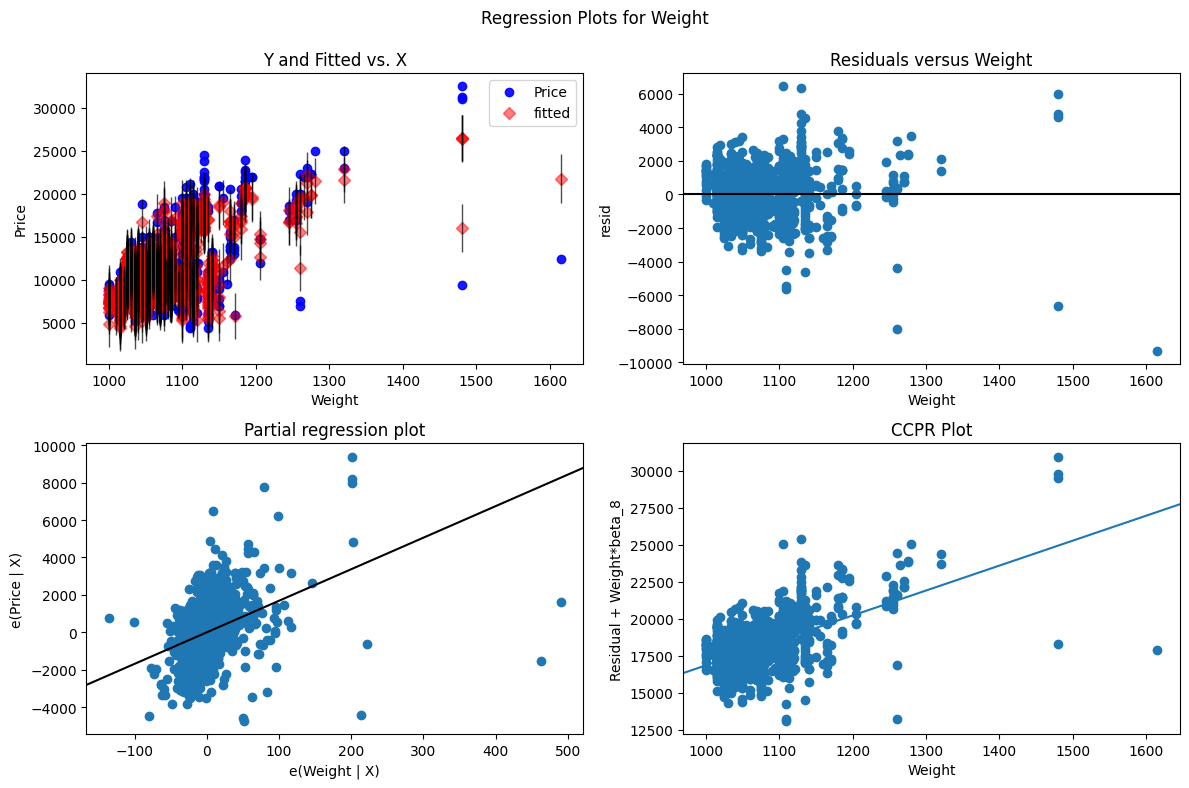

In [920]:
fig = plt.figure(figsize = (12,8))
sm.graphics.plot_regress_exog(final_model, 'Weight', fig=fig)
plt.show()

eval_env: 1


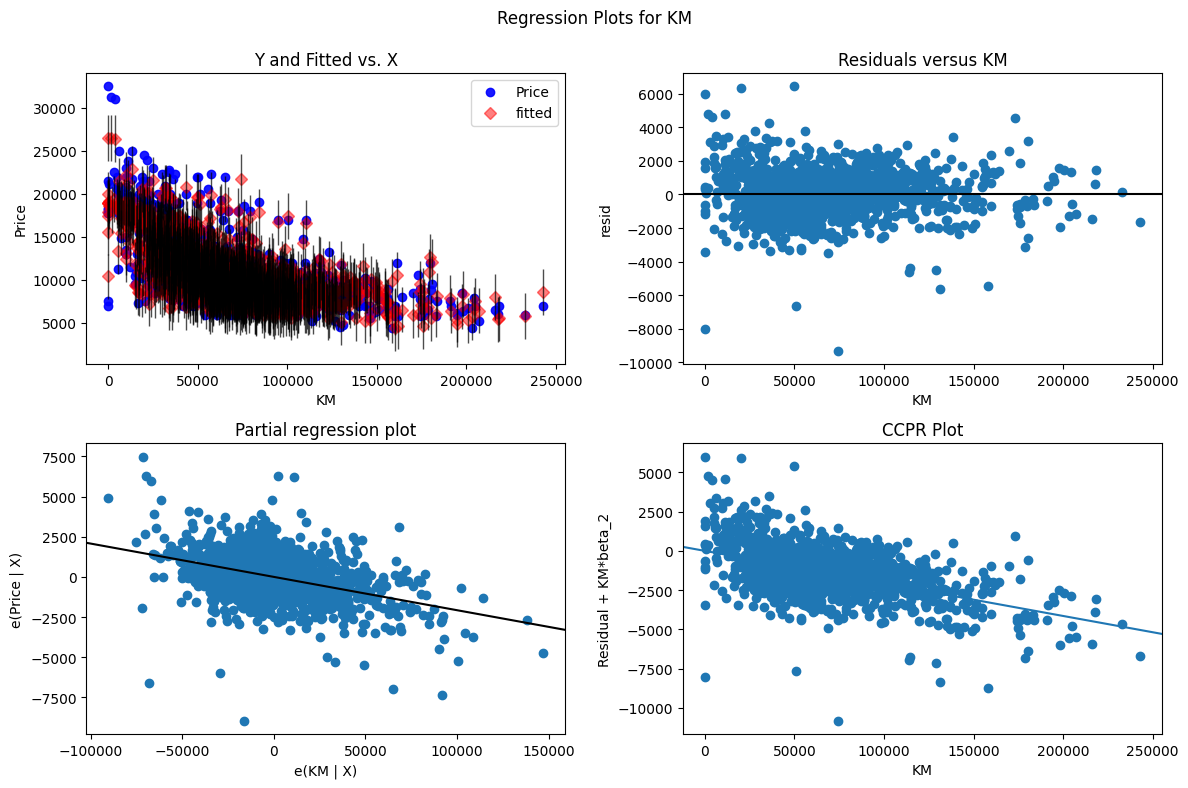

In [921]:
fig = plt.figure(figsize = (12,8))
sm.graphics.plot_regress_exog(final_model, 'KM', fig=fig)
plt.show()

eval_env: 1


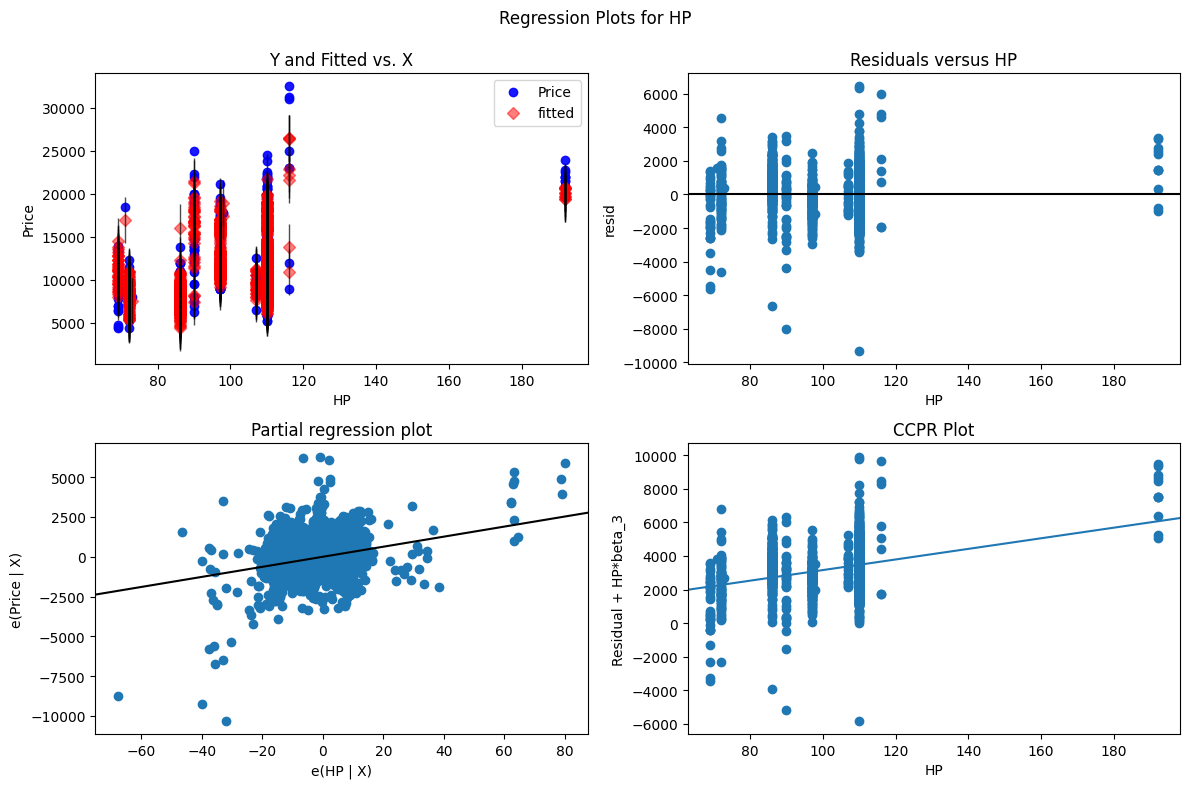

In [922]:
fig = plt.figure(figsize = (12,8))
sm.graphics.plot_regress_exog(final_model, 'HP', fig=fig)
plt.show()

eval_env: 1


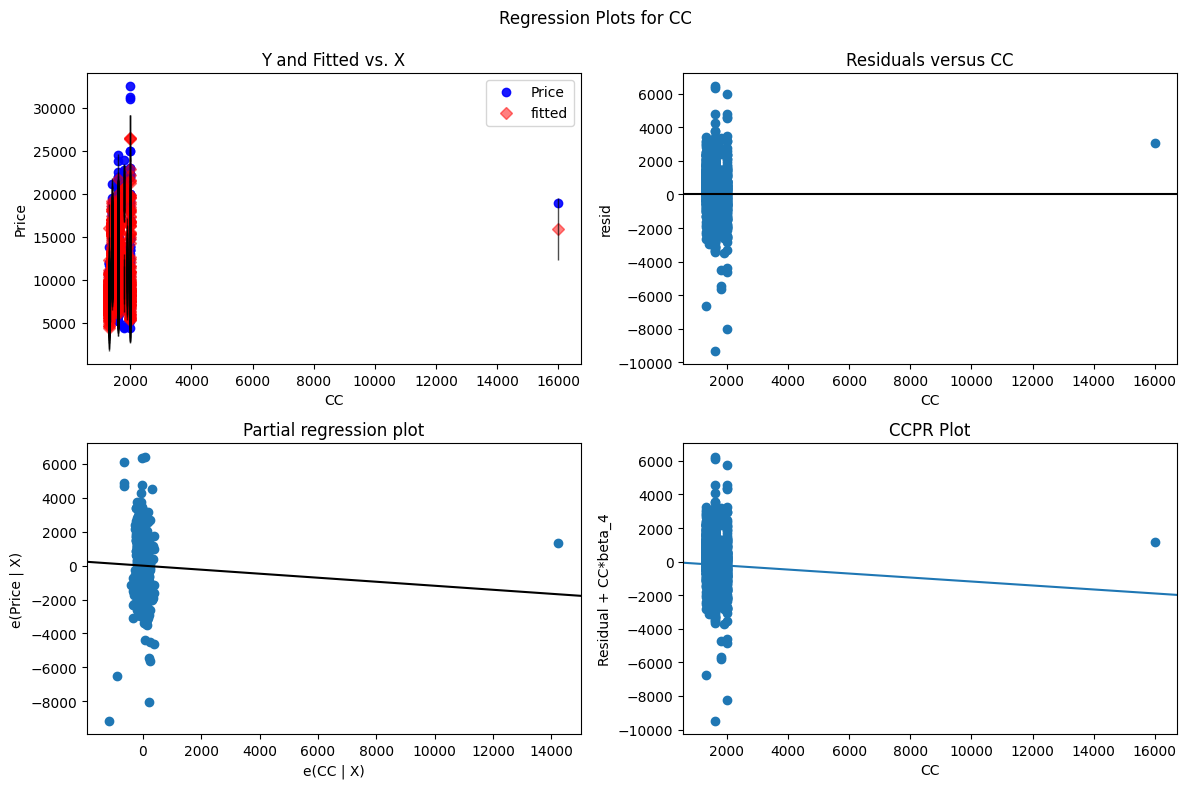

In [923]:
fig = plt.figure(figsize = (12,8))
sm.graphics.plot_regress_exog(final_model, 'CC', fig=fig)
plt.show()

eval_env: 1


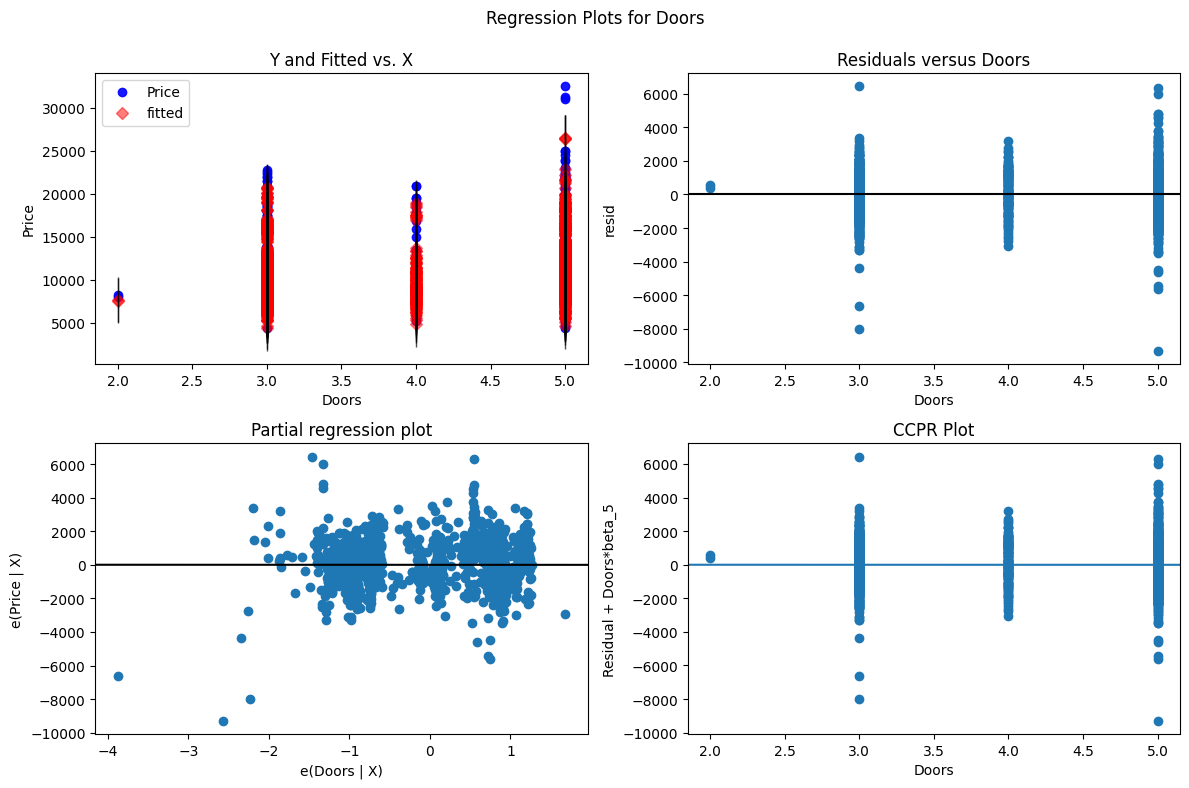

In [924]:
fig = plt.figure(figsize = (12,8))
sm.graphics.plot_regress_exog(final_model, 'Doors', fig=fig)
plt.show()

eval_env: 1


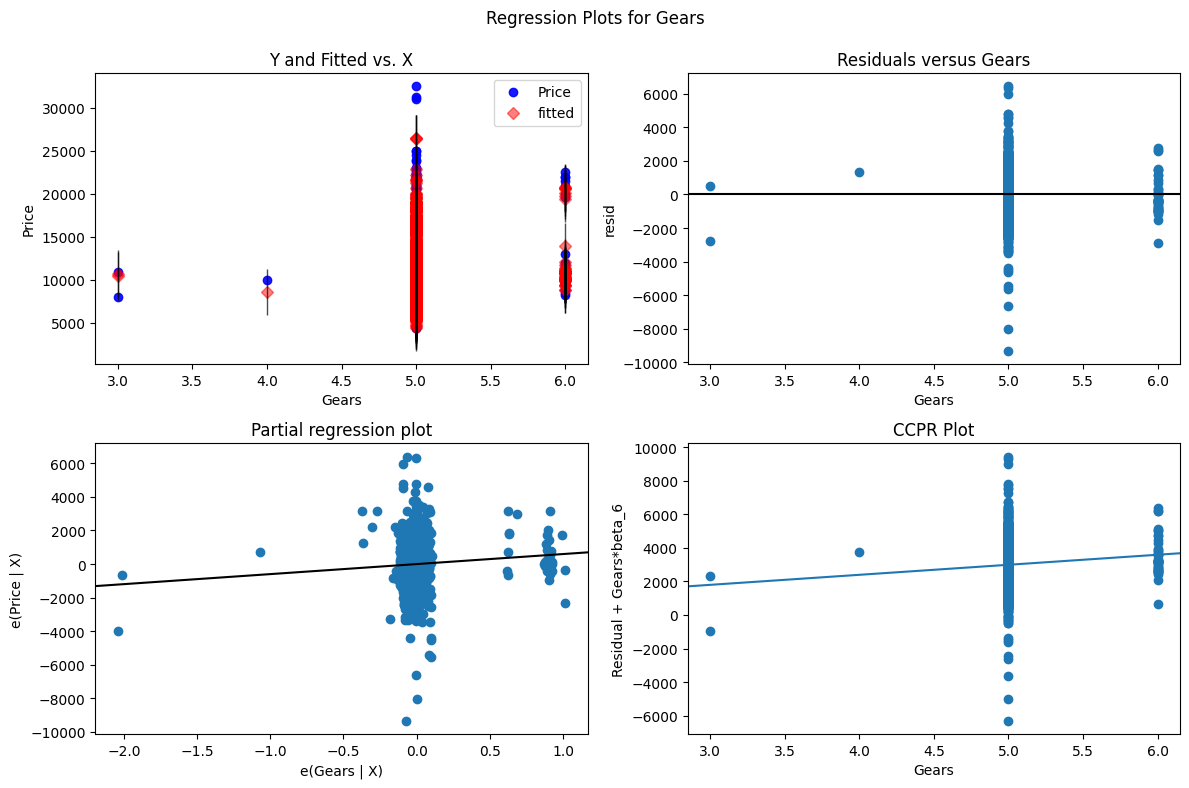

In [925]:
fig = plt.figure(figsize = (12,8))
sm.graphics.plot_regress_exog(final_model, 'Gears', fig=fig)
plt.show()

eval_env: 1


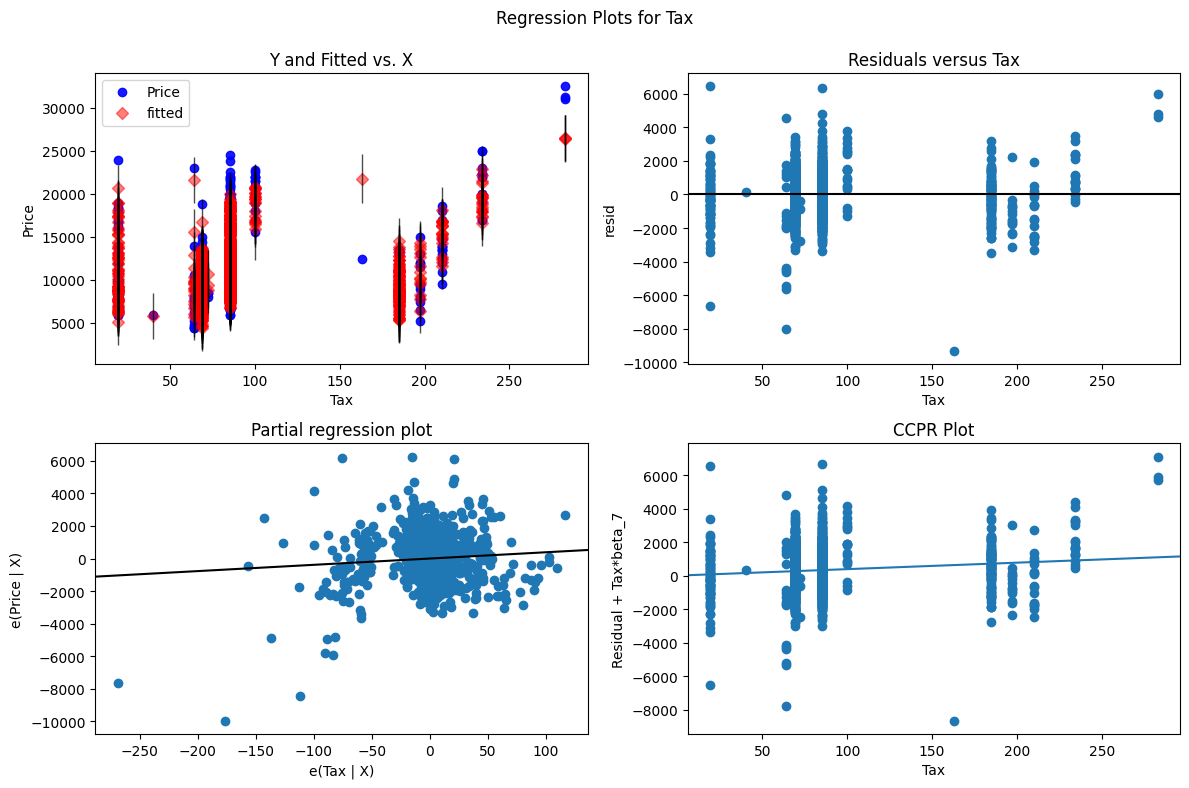

In [926]:
fig = plt.figure(figsize = (12,8))
sm.graphics.plot_regress_exog(final_model, 'Tax', fig=fig)
plt.show()

**9.4 Cook's Distance**



*   For Detecting Influencers/Outliers in the Model






In [927]:
inf_points = final_model.get_influence()
c,p = inf_points.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

<StemContainer object of 3 artists>

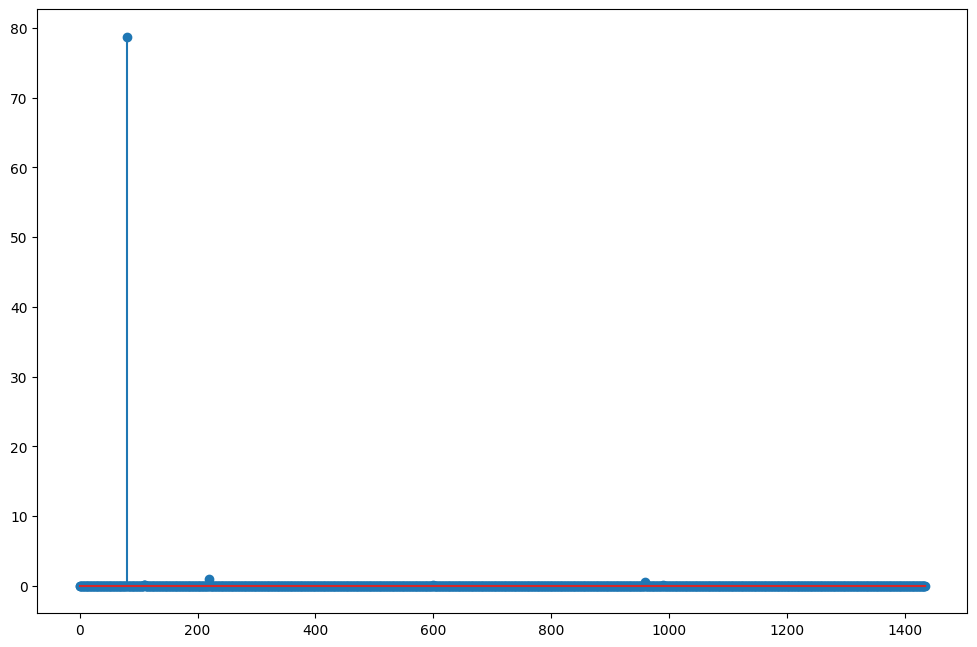

In [928]:
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.dpi'] = 100

# Cook's distance plot

plt.stem(range(len(df)),c)

In [929]:
np.argmax(c),np.max(c)

(80, 78.72950582258932)

In [930]:
df.iloc[[80]]

,Model,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
80,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,20019,110,16000,5,5,100,1180


As we can see, this is the extreme outlier which has highest influence, lets check the leverage befor removing

**9.5 Influence Plot**

In [931]:
k = len(df.columns)
n = len(df)

leverage_cut_off = 3*(k+1)/n
leverage_cut_off

print( 'Leverage Cut off is at', leverage_cut_off)

Leverage Cut off is at 0.022996515679442508


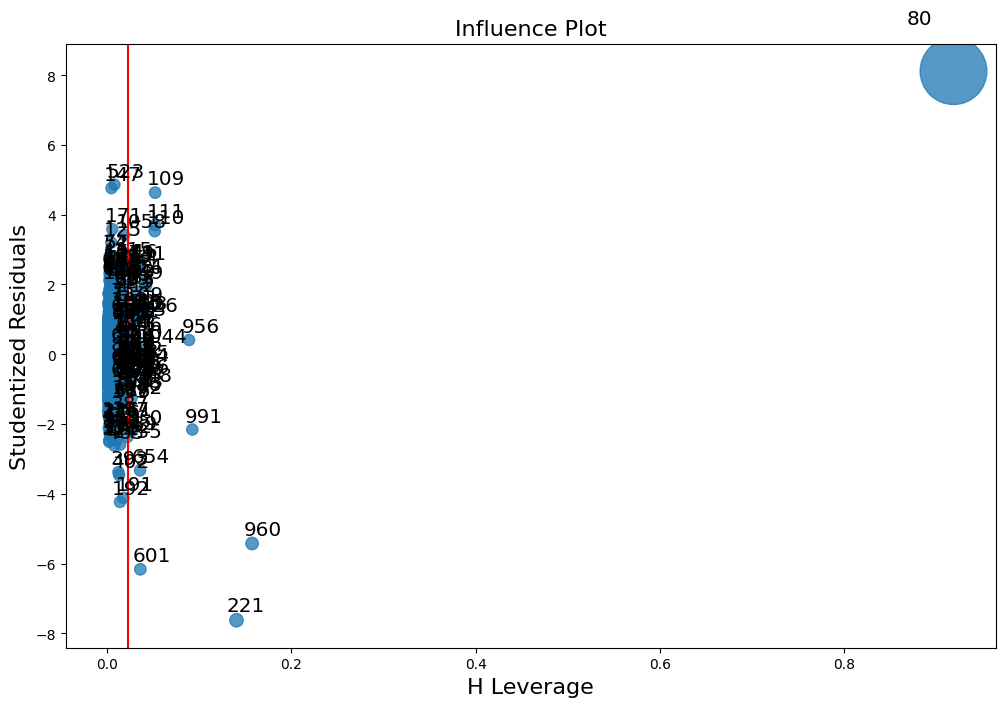

In [932]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(final_model);
plt.axvline(leverage_cut_off,color = 'r')


As we can see,
*   There are lot of influence points above the cut of line
*   Let's improve the model by deleting the influence point and creating a new dataframe




**Model Deletion Diagnostics and Final Model**

In [941]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
while np.max(c)>leverage_cutoff:
 model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight',data=df).fit()
 (c,p)=model.get_influence().cooks_distance
 c
 np.argmax(c) , np.max(c)
 df=df.drop(df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
 df
else:
 final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight',data=df).fit()
 final_model.rsquared , final_model.aic
 print("Thus model accuracy is improved to",final_model.rsquared)


Thus model accuracy is improved to 0.8960864004304144


In [942]:
df.shape

(1415, 10)

In [943]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance
c

array([8.18666846e-03, 4.24327306e-03, 5.81580166e-03, ...,
       3.22220537e-03, 2.45735541e-05, 1.47560469e-03])

In [944]:
np.max(c)

0.0183859926640669

In [946]:
k = len(df.columns)
n = len(df)

cut_off = 3*(k+1)/n
cut_off

print( 'Cut off is at', cut_off)

Cut off is at 0.023321554770318022


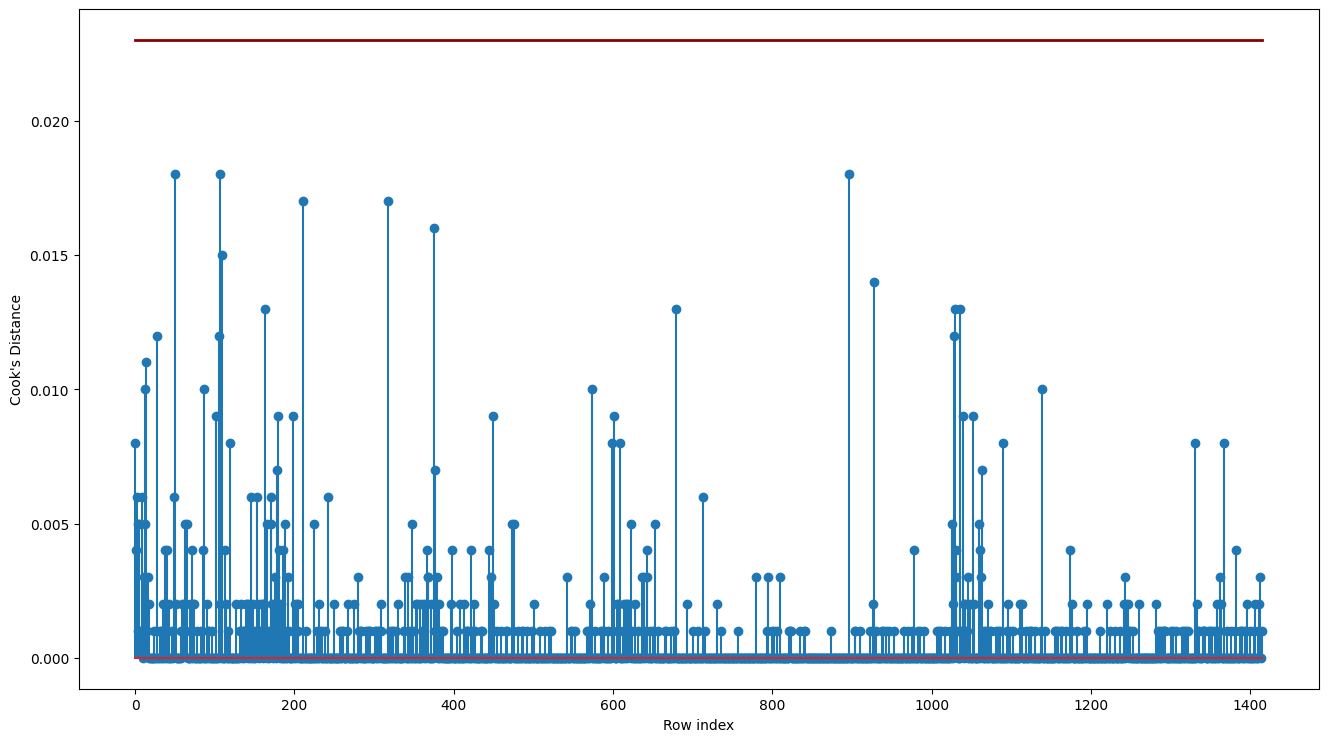

In [945]:
fig = plt.figure(figsize = (16,9))
x = [0,1415]
y = [0.023,0.023]                     # max value is 0.018, cut off line should be at 0.023
plt.plot(x, y,color='darkred', linewidth=2)
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()


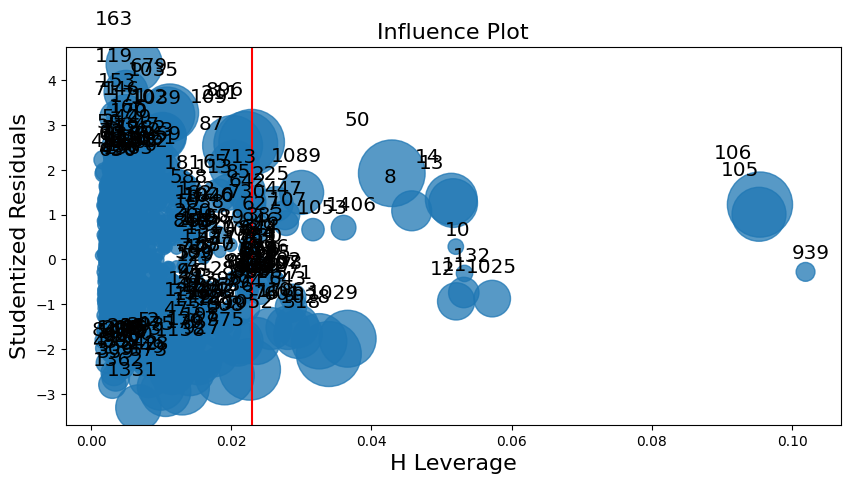

In [947]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 100

influence_plot(final_model);
plt.axvline(leverage_cut_off,color = 'r')

A leverage point is an observation that has an unusual predictor value (very different from the bulk of the observations Viz. the outlier cause the leverage point). 

(i.e) A leverage point is determined by a point whose x-value is an outlier, while the y-value is on the predicted line (y-value is not an outlier). Therefore, this point is undetected by the y outlier detection statistics.

A data point has high leverage if it has "extreme" predictor x values. With a single predictor, an extreme x value is simply one that is particularly high or low.

An influence point is an observation whose removal from the data set would cause a large change in the estimated reggression model coefficients.

(i.e) An influential point is a point that has a large impact on the regression. Surprisingly, these are not the same thing. A point can be an outlier without being influential. A point can be influential without being an outlier. A point can be both or neither.

So, Here, we have removed only the influence points above the cut off point, High leverage points are different from influence points. A high leverage point can be inside or outside of the cut off region. Influence Points cant lie outside the cut off region.

Now, All the points are below our cut-off line.

Hence, we can say that there are no influncers present in our model we can proceed with the predictions.

**Step 10: Trying Model Transformations**

Applying some Data Transformation to increase the linear realtionship and improve our model
prediction as well it scores

**1. Log-Transformation**

In [954]:
log_df = df.copy()            #dummy data copy to test transformations

df_log_scaled = pd.DataFrame()
df_log_scaled['Age'] = np.log(log_df.Age)
df_log_scaled['Price'] = np.log(log_df.Price)
df_log_scaled['KM'] = np.log(log_df.KM)
df_log_scaled['Weight'] = np.log(log_df.Weight)
df_log_scaled['HP'] = log_df['HP']
df_log_scaled['CC'] = log_df['CC']
df_log_scaled['Doors'] = log_df['Doors']
df_log_scaled['Gears'] = log_df['Gears']
df_log_scaled['Tax'] = log_df['Tax']
df_log_scaled.head()

,Age,Price,KM,Weight,HP,CC,Doors,Gears,Tax
0,3.135494,9.510445,10.757605,7.060476,90,2000,3,5,210
1,3.135494,9.528794,11.197351,7.060476,90,2000,3,5,210
2,3.178054,9.543235,10.638520,7.060476,90,2000,3,5,210
3,3.258097,9.612467,10.778956,7.060476,90,2000,3,5,210
4,3.401197,9.528794,10.558414,7.064759,90,2000,3,5,210


In [955]:
log_model = smf.ols('Price ~ Age+ KM + HP + CC + Doors + Gears + Tax + Weight', data = df_log_scaled).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:55:57   Log-Likelihood:                 789.24
No. Observations:                1415   AIC:                            -1560.
Df Residuals:                    1406   BIC:                            -1513.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2844      1.326     -0.214      0.830      -2.886       2.318
Age           -0.4143      0.013    -31.160      0.000      -0.440      -0.388
KM             0.0101      0.006      1.710      0.088      -0.001       0.022
HP             0.0040      0.000     12.369      0.000       0.003       0.005
CC            -0.0003    3.5e-05     -8.226      0.000      -0.000      -0.000
Doors          0.0028      0.004      0.630      0.529      -0.006       0.011
Gears          0.0415      0.022      1.913      0.056      -0.001       0.084
Tax            0.0006      0.000      3.421      0.001       0.000       0.001
Weight         1.5497      0.194      7.986      0.000       1.169       1.930
==============================================================================
Omnibus:                      326.608   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1315.416
Skew:                          -1.057   Prob(JB):                    2.30e-286
Kurtosis:                       7.224   Cond. No.                     5.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**2. Square Root Transformation**

In [956]:
sqrt_df = df.copy()            #dummy data copy to sqrt test transformations

df_sqrt_scaled = pd.DataFrame()
df_sqrt_scaled['Age'] = np.sqrt(sqrt_df.Age)
df_sqrt_scaled['Price'] = np.sqrt(sqrt_df.Price)
df_sqrt_scaled['KM'] = np.sqrt(sqrt_df.KM)
df_sqrt_scaled['Weight'] = np.sqrt(sqrt_df.Weight)
df_sqrt_scaled['HP'] = sqrt_df['HP']
df_sqrt_scaled['CC'] = sqrt_df['CC']
df_sqrt_scaled['Doors'] = sqrt_df['Doors']
df_sqrt_scaled['Gears'] = sqrt_df['Gears']
df_sqrt_scaled['Tax'] = sqrt_df['Tax']
df_sqrt_scaled.head()

,Age,Price,KM,Weight,HP,CC,Doors,Gears,Tax
0,4.795832,116.189500,216.762543,34.132096,90,2000,3,5,210
1,4.795832,117.260394,270.068510,34.132096,90,2000,3,5,210
2,4.898979,118.110118,204.232710,34.132096,90,2000,3,5,210
3,5.099020,122.270193,219.089023,34.132096,90,2000,3,5,210
4,5.477226,117.260394,196.214169,34.205263,90,2000,3,5,210


In [957]:
sqrt_model = smf.ols('Price ~ Age+ KM + HP + CC + Doors + Gears + Tax + Weight', data = df_sqrt_scaled).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1334.
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:57:51   Log-Likelihood:                -4368.2
No. Observations:                1415   AIC:                             8754.
Df Residuals:                    1406   BIC:                             8802.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -45.8439     13.397     -3.422      0.001     -72.125     -19.563
Age           -6.8064      0.158    -43.175      0.000      -7.116      -6.497
KM            -0.0419      0.003    -14.578      0.000      -0.048      -0.036
HP             0.1438      0.013     11.206      0.000       0.119       0.169
CC            -0.0104      0.001     -7.596      0.000      -0.013      -0.008
Doors         -0.0465      0.167     -0.279      0.781      -0.374       0.281
Gears          2.5287      0.832      3.040      0.002       0.897       4.160
Tax            0.0242      0.006      3.772      0.000       0.012       0.037
Weight         5.9809      0.427     14.000      0.000       5.143       6.819
==============================================================================
Omnibus:                       15.721   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.710
Skew:                          -0.157   Prob(JB):                     5.25e-05
Kurtosis:                       3.485   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**3. Square Transformation**

In [959]:
square_df = df.copy()            #dummy data copy to sqrt test transformations

df_square_scaled = pd.DataFrame()
df_square_scaled['Age'] = np.square(square_df.Age)
df_square_scaled['Price'] = np.square(square_df.Price)
df_square_scaled['KM'] = np.square(square_df.KM)
df_square_scaled['Weight'] = np.square(square_df.Weight)
df_square_scaled['HP'] = sqrt_df['HP']
df_square_scaled['CC'] = sqrt_df['CC']
df_square_scaled['Doors'] = sqrt_df['Doors']
df_square_scaled['Gears'] = sqrt_df['Gears']
df_square_scaled['Tax'] = sqrt_df['Tax']
df_square_scaled.head()

,Age,Price,KM,Weight,HP,CC,Doors,Gears,Tax
0,529,182250000,2207684196,1357225,90,2000,3,5,210
1,529,189062500,5319805969,1357225,90,2000,3,5,210
2,576,194602500,1739807521,1357225,90,2000,3,5,210
3,676,223502500,2304000000,1357225,90,2000,3,5,210
4,900,189062500,1482250000,1368900,90,2000,3,5,210


In [960]:
square_model = smf.ols('Price ~ Age+ KM + HP + CC + Doors + Gears + Tax + Weight', data = df_square_scaled).fit()
square_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     887.3
Date:                Thu, 16 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:01:12   Log-Likelihood:                -26739.
No. Observations:                1415   AIC:                         5.350e+04
Df Residuals:                    1406   BIC:                         5.354e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.347e+08   3.38e+07     -9.905      0.000   -4.01e+08   -2.68e+08
Age        -2.269e+04    699.818    -32.416      0.000   -2.41e+04   -2.13e+04
KM            -0.0015      0.000     -7.940      0.000      -0.002      -0.001
HP          8.298e+05   9.68e+04      8.570      0.000     6.4e+05    1.02e+06
CC         -1.658e+05   9708.065    -17.078      0.000   -1.85e+05   -1.47e+05
Doors      -1.025e+07    1.2e+06     -8.561      0.000   -1.26e+07    -7.9e+06
Gears      -6.368e+06    6.1e+06     -1.043      0.297   -1.83e+07     5.6e+06
Tax        -1.391e+05   4.73e+04     -2.939      0.003   -2.32e+05   -4.63e+04
Weight       705.7472     17.922     39.379      0.000     670.591     740.904
==============================================================================
Omnibus:                      371.575   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1728.304
Skew:                           1.162   Prob(JB):                         0.00
Kurtosis:                       7.890   Cond. No.                     3.03e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [963]:
final_model.rsquared,final_model.rsquared_adj

(0.8960864004304144, 0.8954951423958791)

In [966]:
accuracy_df = pd.DataFrame({'Model':        ['Actual Model', 'Log Transformation Model', 'Square Root Transformation Model', 'Square Transformation Model'], 
                            'Rsquared':     [final_model.rsquared, log_model.rsquared, sqrt_model.rsquared, square_model.rsquared],
                            'Rsquared_adj': [final_model.rsquared_adj, log_model.rsquared_adj, sqrt_model.rsquared_adj, square_model.rsquared_adj]})

accuracy_df = accuracy_df.sort_values(by = 'Rsquared', ascending = False)
accuracy_df

,Model,Rsquared,Rsquared_adj
0,Actual Model,0.896086,0.895495
2,Square Root Transformation Model,0.883615,0.882953
3,Square Transformation Model,0.834676,0.833735
1,Log Transformation Model,0.767196,0.765871


As we can see, 

Our actual model has the highest Rsquare and adjusted Rsquare score.

So, lets proceed to predict new values with the final_model

**Step 11: Prediction Values using the model**

In [973]:
#Manual prediction of price

new_data = pd.DataFrame({'Age':[4,30,15],
                         "KM": [2000, 90000,9000],
                         "HP": [90,80,100],
                         "CC": [1300, 2000, 2500],
                         "Doors": [3, 4, 3],
                         "Gears": [5, 5, 5],
                         "Tax":  [69, 85, 69],
                         "Weight": [1000, 1090, 2000]},    ,index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,4,2000,90,1300,3,5,69,1000
1,30,90000,80,2000,4,5,85,1090
2,15,9000,100,2500,3,5,69,2000


In [982]:
predicted_price = (final_model.predict(new_data))
predicted_price


0    15966.831667
1    11800.919757
2    43548.924283
dtype: float64

Prediicting existing data

In [983]:
price_prediction_df = df.head(5) 

In [984]:
price_prediction_df 

,Model,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,2000,3,5,210,1165
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,2000,3,5,210,1165
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,2000,3,5,210,1165
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,2000,3,5,210,1165
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,2000,3,5,210,1170


In [985]:
y_pred = (final_model.predict(price_prediction_df))
y_pred

0    16302.663659
1    15853.146696
2    16283.768095
3    15954.295872
4    15840.862415
dtype: float64

In [987]:
pd.DataFrame({ 'Model' : price_prediction_df['Model'],
              'Actual Price' : price_prediction_df['Price'],
              'Predicted Price' : y_pred})

,Model,Actual Price,Predicted Price
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,16302.663659
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,15853.146696
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,16283.768095
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,15954.295872
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,15840.862415
